# BANK LOAN MODELING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df=loans_2007=pd.read_csv("loans_2007.csv")
df=loans_2007.copy()

In [ ]:
df


# DATA PREPROCESSING

In [5]:

#Let's catch the outliers first.

In [6]:


df.shape


(42538, 52)

In [7]:

df.isnull().sum()


id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2629
emp_length                    1115
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
revol_bal           

In [8]:
#We delete columns of data that we do not need directly.

In [9]:
removed_columns=['id','member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d','zip_code',
                 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
df=df.drop(removed_columns, axis=1)
df.head(50)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.00,Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.00,Source Verified,Charged Off,n,...,f,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.00,Not Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.00,Source Verified,Fully Paid,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.00,Source Verified,Current,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.00,Source Verified,Fully Paid,n,...,f,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
6,7000.0,60 months,15.96%,170.08,8 years,RENT,47004.00,Not Verified,Fully Paid,n,...,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
7,3000.0,36 months,18.64%,109.43,9 years,RENT,48000.00,Source Verified,Fully Paid,n,...,f,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
8,5600.0,60 months,21.28%,152.39,4 years,OWN,40000.00,Source Verified,Charged Off,n,...,f,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
9,5375.0,60 months,12.69%,121.45,< 1 year,RENT,15000.00,Verified,Charged Off,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [10]:
df.dropna(how="all",axis=0)
df.dropna(how="all", axis=1)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,f,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,6500.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,f,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,5000.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,f,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

In [12]:
df.dtypes.value_counts()

float64    17
object     15
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.00,9700.00,15000.00,35000.00
installment,42535.0,322.623063,208.927216,15.67,165.52,277.69,428.18,1305.19
annual_inc,42531.0,69136.556420,64096.349719,1896.00,40000.00,59000.00,82500.00,6000000.00
dti,42535.0,13.373043,6.726315,0.00,8.20,13.47,18.68,29.99
delinq_2yrs,42506.0,0.152449,0.512406,0.00,0.00,0.00,0.00,13.00
inq_last_6mths,42506.0,1.081424,1.527455,0.00,0.00,1.00,2.00,33.00
open_acc,42506.0,9.343951,4.496274,1.00,6.00,9.00,12.00,47.00
pub_rec,42506.0,0.058156,0.245713,0.00,0.00,0.00,0.00,5.00
revol_bal,42535.0,14297.860915,22018.441010,0.00,3635.00,8821.00,17251.00,1207359.00
total_acc,42506.0,22.124406,11.592811,1.00,13.00,20.00,29.00,90.00


In [14]:
df.loan_status.value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [15]:
#Since the important thing for us is whether the loan is paid on time or not, I flew other data.

In [16]:
drop_columns=[]
for col in df.columns:
    is_unique=len(df[col].dropna().unique())
    if is_unique==1:
        drop_columns.append(col)

In [17]:
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths']

In [18]:
df=df.drop(drop_columns, axis=1)

In [19]:


df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]


In [20]:
mapping_dict={
    "loan_status":{
        "Fully Paid"  :1,
        "Charged Off" :0
    }
}
df=df.replace(mapping_dict)

In [21]:
df.loan_status.value_counts()

1    34085
0     5662
Name: loan_status, dtype: int64

# Visualizing the missing data structure

In [22]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import missingno as msno



<Axes: >

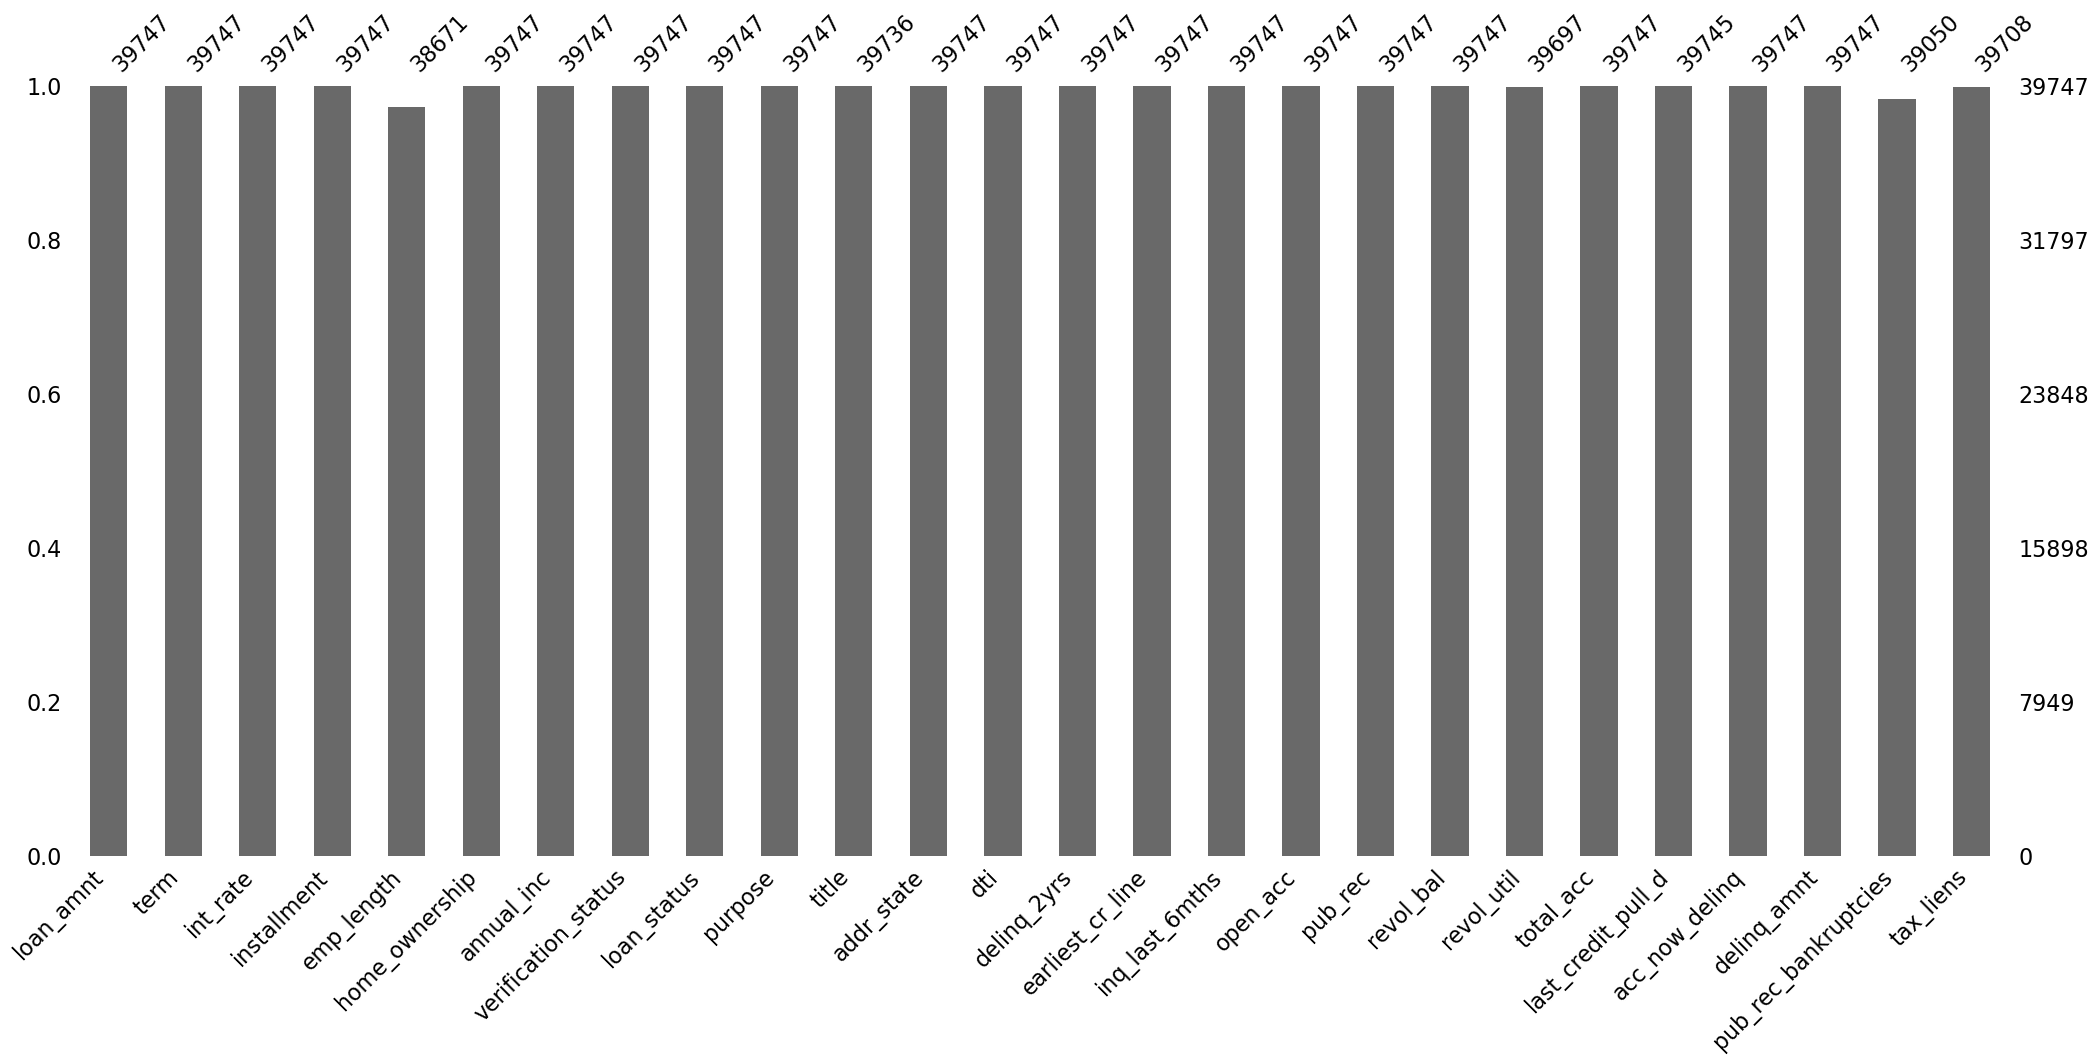

In [24]:
msno.bar(df)

<Axes: >

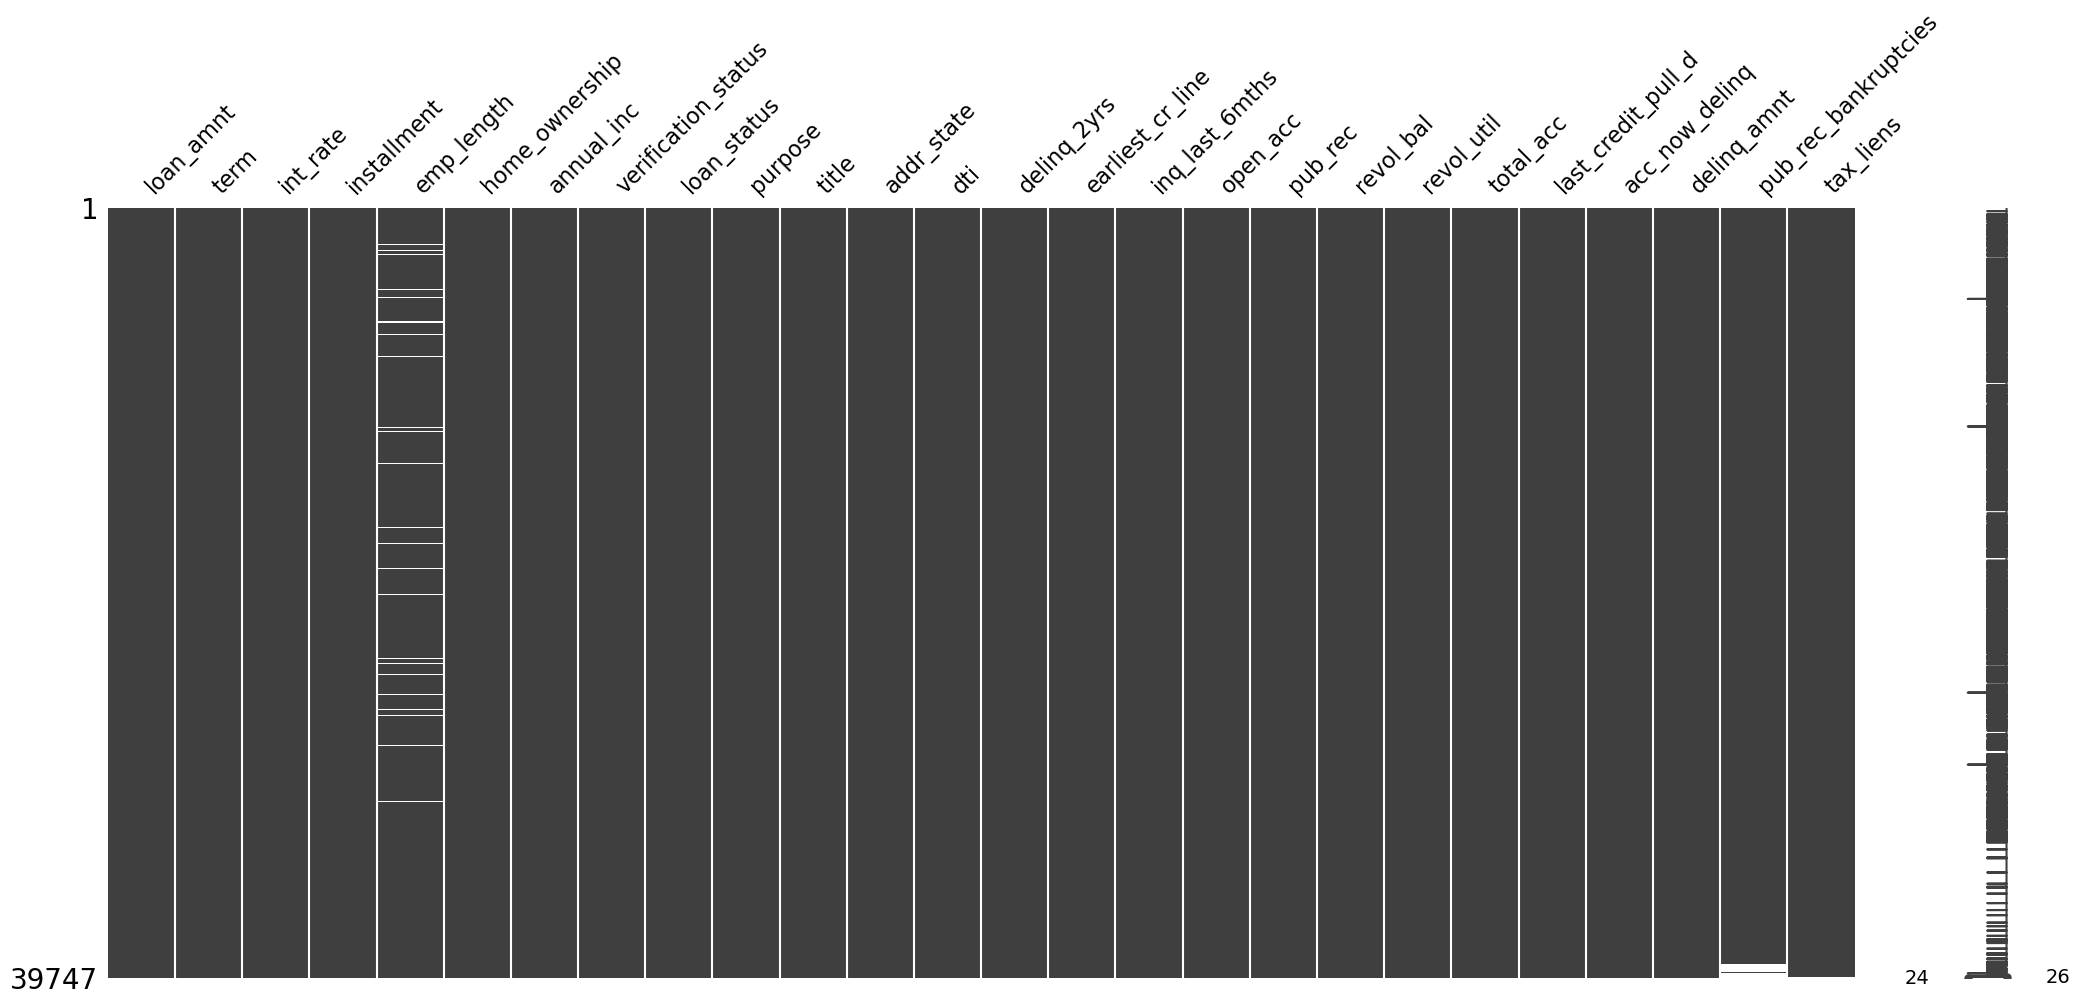

In [25]:
msno.matrix(df)



In [26]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1076
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
acc_now_delinq             0
delinq_amnt                0
pub_rec_bankruptcies     697
tax_liens                 39
dtype: int64

<Axes: >

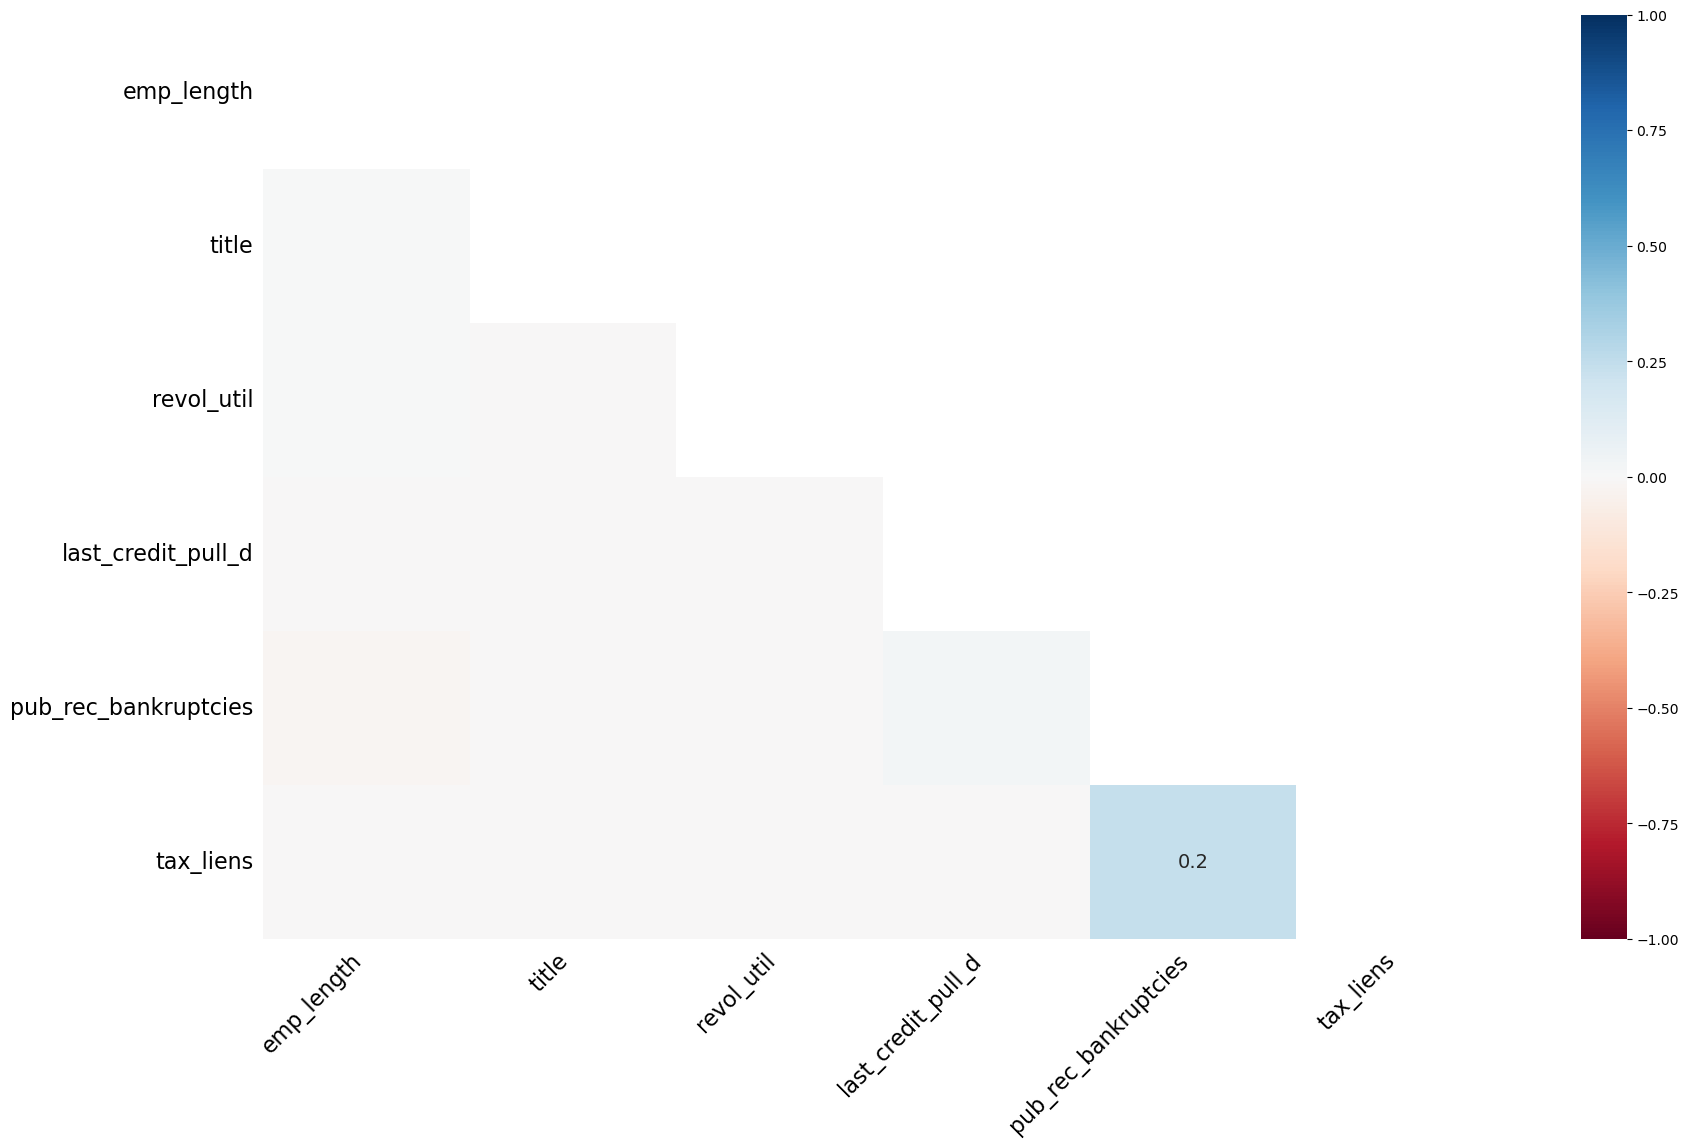

In [27]:

msno.heatmap(df)

In [28]:
df.tail(50)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
39736,2500.0,36 months,12.80%,84.00,< 1 year,MORTGAGE,32000.0,Not Verified,0,home_improvement,...,11.0,0.0,3408.0,35.1%,32.0,Dec-2016,0.0,0.0,NaN,0.0
39737,2500.0,36 months,9.64%,80.26,< 1 year,MORTGAGE,75000.0,Not Verified,0,home_improvement,...,9.0,0.0,269.0,3.8%,35.0,Dec-2016,0.0,0.0,NaN,0.0
39738,6500.0,36 months,15.01%,225.37,9 years,MORTGAGE,213000.0,Not Verified,0,small_business,...,11.0,0.0,56411.0,75.3%,28.0,Dec-2016,0.0,0.0,NaN,0.0
39739,8000.0,36 months,9.96%,257.99,3 years,RENT,48000.0,Not Verified,1,debt_consolidation,...,10.0,0.0,11289.0,47.8%,15.0,Feb-2014,0.0,0.0,NaN,0.0
39740,7500.0,36 months,8.07%,235.25,1 year,MORTGAGE,150000.0,Not Verified,1,home_improvement,...,15.0,0.0,23678.0,24.4%,60.0,Jun-2007,0.0,0.0,NaN,NaN
39741,5000.0,36 months,7.43%,155.38,< 1 year,MORTGAGE,70000.0,Not Verified,1,credit_card,...,13.0,0.0,813.0,1%,36.0,Jun-2009,0.0,0.0,NaN,0.0
39742,5000.0,36 months,7.75%,156.11,1 year,MORTGAGE,225000.0,Not Verified,1,home_improvement,...,12.0,0.0,2160.0,2.3%,22.0,Jan-2010,0.0,0.0,NaN,0.0
39743,10000.0,36 months,13.75%,340.57,< 1 year,RENT,35000.0,Not Verified,1,debt_consolidation,...,10.0,0.0,22213.0,65.9%,22.0,Aug-2010,0.0,0.0,NaN,0.0
39744,5000.0,36 months,9.64%,160.51,3 years,MORTGAGE,130000.0,Not Verified,1,debt_consolidation,...,9.0,0.0,20969.0,40.2%,26.0,Aug-2010,0.0,0.0,NaN,0.0
39745,5000.0,36 months,7.43%,155.38,4 years,RENT,200000.0,Not Verified,1,house,...,2.0,0.0,3164.0,13.7%,2.0,May-2007,0.0,0.0,NaN,NaN


In [29]:
#Which data has null values, now we will get to them.

In [30]:
 null_counts=df.isnull().sum()
 null_counts[null_counts>0]

emp_length              1076
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
tax_liens                 39
dtype: int64

In [31]:
print(df.value_counts(normalize=True, dropna=False))

loan_amnt  term        int_rate  installment  emp_length  home_ownership  annual_inc  verification_status  loan_status  purpose             title                    addr_state  dti    delinq_2yrs  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  last_credit_pull_d  acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  tax_liens
500.0       36 months    8.07%   15.69        < 1 year    RENT            18000.0     Not Verified         1            other               buying a new computer    NY          4.27   0.0          Nov-2003          0.0             4.0       0.0      0.0        0%          4.0        Nov-2015            0.0             0.0          NaN                   0.0          0.000025
12750.0     36 months   15.95%   447.94       10+ years   MORTGAGE        105000.0    Source Verified      1            home_improvement    Kitchen update           NY          10.59  0.0          Jul-1988          2.0             6.0       0.0      14026.0 

In [32]:
df=df.drop('pub_rec_bankruptcies', axis=1)

In [33]:
df=df.dropna(axis=0)

In [34]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
acc_now_delinq         0
delinq_amnt            0
tax_liens              0
dtype: int64

In [35]:
#Empty values are cleared.

In [36]:
#Below is the code to fix accidentally duplicated data types.

In [37]:
duplicated_data_type = 'object'
df = df.loc[:, ~df.columns.duplicated()]
duplicated_data_type = ["float64","int64"]
df = df.loc[:, ~df.columns.duplicated()]

In [38]:
df.dtypes.value_counts()

float64    13
object     11
int64       1
dtype: int64

In [39]:
df_full=df.copy()

In [40]:
df_full

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,credit_card,...,1.0,3.0,0.0,13648.0,83.7%,9.0,Dec-2016,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,car,...,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,small_business,...,2.0,2.0,0.0,2956.0,98.5%,10.0,Dec-2016,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,other,...,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,1,wedding,...,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36 months,8.07%,109.79,5 years,RENT,98000.0,Not Verified,1,credit_card,...,0.0,19.0,0.0,6432.0,6%,37.0,Jul-2010,0.0,0.0,0.0
39749,3000.0,36 months,11.86%,99.44,2 years,MORTGAGE,36153.0,Not Verified,1,debt_consolidation,...,2.0,3.0,1.0,1064.0,70.9%,6.0,Jul-2010,0.0,0.0,0.0
39750,3500.0,36 months,10.28%,113.39,< 1 year,RENT,20000.0,Not Verified,1,moving,...,0.0,17.0,0.0,1882.0,32.4%,18.0,Aug-2010,0.0,0.0,0.0
39752,5000.0,36 months,7.43%,155.38,6 years,RENT,40000.0,Not Verified,1,car,...,2.0,4.0,0.0,2562.0,14%,7.0,Apr-2016,0.0,0.0,0.0


# Multivariate Outlier Observation Analysis

In [41]:
import seaborn as sns
df=df.select_dtypes(include=["float64","int64"])

In [42]:
#I prefer the LOF method (Local Outlier Factor) for multivariate outlier observations.

In [43]:
from sklearn.neighbors import LocalOutlierFactor

In [44]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [45]:
clf.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [46]:


df_scores=clf.negative_outlier_factor_

In [47]:
df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens
0,5000.0,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,0.0,0.0,0.0
1,2500.0,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,0.0,0.0,0.0
2,2400.0,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,0.0,0.0,0.0
3,10000.0,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,0.0,0.0,0.0
5,5000.0,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,109.79,98000.0,1,8.52,1.0,0.0,19.0,0.0,6432.0,37.0,0.0,0.0,0.0
39749,3000.0,99.44,36153.0,1,7.47,0.0,2.0,3.0,1.0,1064.0,6.0,0.0,0.0,0.0
39750,3500.0,113.39,20000.0,1,1.50,0.0,0.0,17.0,0.0,1882.0,18.0,0.0,0.0,0.0
39752,5000.0,155.38,40000.0,1,2.55,0.0,2.0,4.0,0.0,2562.0,7.0,0.0,0.0,0.0


In [48]:

np.sort(df_scores)[0:1000]

array([-16.98727819, -10.13315368,  -4.38111676,  -3.89132538,
        -3.49690444,  -2.99070629,  -2.60497528,  -2.54060436,
        -2.51078757,  -2.38663359,  -2.33829468,  -2.29694462,
        -2.23915175,  -2.23280235,  -2.22416371,  -2.22393342,
        -2.22373824,  -2.14729155,  -2.04867893,  -2.02476506,
        -1.97324952,  -1.93651111,  -1.90744009,  -1.80654858,
        -1.78738407,  -1.76804031,  -1.75157978,  -1.74370268,
        -1.73679085,  -1.70846559,  -1.70574209,  -1.69331091,
        -1.69183892,  -1.65029654,  -1.64720886,  -1.64709617,
        -1.64235915,  -1.64212534,  -1.61053986,  -1.59972841,
        -1.59604074,  -1.5935819 ,  -1.58350891,  -1.57898653,
        -1.57876859,  -1.57796315,  -1.5703738 ,  -1.56807942,
        -1.56495872,  -1.55610646,  -1.55422785,  -1.51639189,
        -1.48197437,  -1.48074346,  -1.47657365,  -1.47326781,
        -1.47318426,  -1.4669495 ,  -1.46591331,  -1.46171577,
        -1.45611161,  -1.45510658,  -1.45042927,  -1.45

In [49]:

threshold_value=np.sort(df_scores)[19]

In [50]:
threshold_value

-2.024765055846749

In [51]:
against_tf=df_scores<threshold_value


In [52]:
against_tf

array([False, False, False, ..., False, False, False])

In [53]:

df_scores[against_tf][0:100]

array([ -3.49690444,  -2.38663359,  -2.51078757,  -2.33829468,
        -2.23915175,  -3.89132538,  -2.22416371,  -2.22373824,
        -2.14729155,  -2.99070629, -10.13315368, -16.98727819,
        -2.22393342,  -2.60497528,  -2.54060436,  -2.29694462,
        -2.04867893,  -4.38111676,  -2.23280235])

In [54]:
df[df_scores==threshold_value]

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens
12984,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0


In [55]:
pressure_value=df[df_scores==threshold_value]

In [56]:
outliers=df[df_scores<threshold_value]

In [57]:
df_scores[against_tf][0:19]

array([ -3.49690444,  -2.38663359,  -2.51078757,  -2.33829468,
        -2.23915175,  -3.89132538,  -2.22416371,  -2.22373824,
        -2.14729155,  -2.99070629, -10.13315368, -16.98727819,
        -2.22393342,  -2.60497528,  -2.54060436,  -2.29694462,
        -2.04867893,  -4.38111676,  -2.23280235])

In [58]:
otliers=df[against_tf]

In [59]:
outliers

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens
7268,12025.0,412.57,1782000.0,1,1.31,0.0,0.0,9.0,0.0,49208.0,30.0,0.0,0.0,0.0
10650,15775.0,358.85,1250000.0,0,21.81,0.0,0.0,10.0,0.0,48258.0,28.0,0.0,0.0,0.0
16066,23000.0,492.88,28000.0,1,18.73,0.0,0.0,17.0,0.0,48780.0,57.0,0.0,0.0,0.0
19675,5000.0,151.64,25040.0,1,16.29,0.0,0.0,5.0,0.0,50638.0,8.0,0.0,0.0,0.0
21477,10000.0,306.68,1200000.0,1,1.46,0.0,0.0,6.0,0.0,75706.0,13.0,0.0,0.0,0.0
23618,1500.0,45.75,1900000.0,1,0.57,0.0,2.0,17.0,0.0,17396.0,36.0,0.0,0.0,0.0
24233,25000.0,597.38,1200000.0,1,0.41,0.0,1.0,4.0,0.0,11168.0,12.0,0.0,0.0,0.0
25831,12000.0,373.33,1200000.0,1,9.17,0.0,2.0,12.0,0.0,26684.0,26.0,0.0,0.0,0.0
27633,5600.0,129.18,1176000.0,1,1.22,1.0,0.0,6.0,0.0,11753.0,25.0,0.0,0.0,0.0
27870,2000.0,62.57,18000.0,1,20.20,0.0,0.0,3.0,0.0,53437.0,7.0,0.0,0.0,0.0


In [60]:
outliers.to_records(index=False)

rec.array([(12025., 412.57, 1782000., 1, 1.310e+00, 0., 0.,  9., 0., 4.9208e+04, 30., 0., 0., 0.),
           (15775., 358.85, 1250000., 0, 2.181e+01, 0., 0., 10., 0., 4.8258e+04, 28., 0., 0., 0.),
           (23000., 492.88,   28000., 1, 1.873e+01, 0., 0., 17., 0., 4.8780e+04, 57., 0., 0., 0.),
           ( 5000., 151.64,   25040., 1, 1.629e+01, 0., 0.,  5., 0., 5.0638e+04,  8., 0., 0., 0.),
           (10000., 306.68, 1200000., 1, 1.460e+00, 0., 0.,  6., 0., 7.5706e+04, 13., 0., 0., 0.),
           ( 1500.,  45.75, 1900000., 1, 5.700e-01, 0., 2., 17., 0., 1.7396e+04, 36., 0., 0., 0.),
           (25000., 597.38, 1200000., 1, 4.100e-01, 0., 1.,  4., 0., 1.1168e+04, 12., 0., 0., 0.),
           (12000., 373.33, 1200000., 1, 9.170e+00, 0., 2., 12., 0., 2.6684e+04, 26., 0., 0., 0.),
           ( 5600., 129.18, 1176000., 1, 1.220e+00, 1., 0.,  6., 0., 1.1753e+04, 25., 0., 0., 0.),
           ( 2000.,  62.57,   18000., 1, 2.020e+01, 0., 0.,  3., 0., 5.3437e+04,  7., 0., 0., 0.),
          

In [61]:
#The action we have done above; DataFrame; numpy is to convert to array. Thus, we got rid of indexes.

In [62]:
res=outliers.to_records(index=False)

In [63]:
res[:]=pressure_value.to_records(index=False)

In [64]:
res

rec.array([(22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 517.52, 34000., 0, 21.56, 0., 1., 11., 0., 34683., 37., 0., 0., 0.),
           (22750., 5

In [65]:
#The pressure threshold has replaced all the contradictions.

In [66]:
#Numpy arrays now need to be converted to DataFrame again.

In [67]:
df[against_tf]=pd.DataFrame(res,index=df[against_tf].index)



In [68]:
df[against_tf]

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens
7268,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
10650,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
16066,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
19675,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
21477,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
23618,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
24233,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
25831,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
27633,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0
27870,22750.0,517.52,34000.0,0,21.56,0.0,1.0,11.0,0.0,34683.0,37.0,0.0,0.0,0.0


In [69]:
df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens
0,5000.0,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,0.0,0.0,0.0
1,2500.0,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,0.0,0.0,0.0
2,2400.0,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,0.0,0.0,0.0
3,10000.0,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,0.0,0.0,0.0
5,5000.0,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,109.79,98000.0,1,8.52,1.0,0.0,19.0,0.0,6432.0,37.0,0.0,0.0,0.0
39749,3000.0,99.44,36153.0,1,7.47,0.0,2.0,3.0,1.0,1064.0,6.0,0.0,0.0,0.0
39750,3500.0,113.39,20000.0,1,1.50,0.0,0.0,17.0,0.0,1882.0,18.0,0.0,0.0,0.0
39752,5000.0,155.38,40000.0,1,2.55,0.0,2.0,4.0,0.0,2562.0,7.0,0.0,0.0,0.0


# convert object data to numeric data



In [70]:
mapping_dict={
    "loan_status":{"Fully Paid"  :1,
                   "Charged Off" :0
    }
}
df=df.replace(mapping_dict)

In [71]:
df_full

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,credit_card,...,1.0,3.0,0.0,13648.0,83.7%,9.0,Dec-2016,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,car,...,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,small_business,...,2.0,2.0,0.0,2956.0,98.5%,10.0,Dec-2016,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,other,...,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,1,wedding,...,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36 months,8.07%,109.79,5 years,RENT,98000.0,Not Verified,1,credit_card,...,0.0,19.0,0.0,6432.0,6%,37.0,Jul-2010,0.0,0.0,0.0
39749,3000.0,36 months,11.86%,99.44,2 years,MORTGAGE,36153.0,Not Verified,1,debt_consolidation,...,2.0,3.0,1.0,1064.0,70.9%,6.0,Jul-2010,0.0,0.0,0.0
39750,3500.0,36 months,10.28%,113.39,< 1 year,RENT,20000.0,Not Verified,1,moving,...,0.0,17.0,0.0,1882.0,32.4%,18.0,Aug-2010,0.0,0.0,0.0
39752,5000.0,36 months,7.43%,155.38,6 years,RENT,40000.0,Not Verified,1,car,...,2.0,4.0,0.0,2562.0,14%,7.0,Apr-2016,0.0,0.0,0.0


In [72]:
df_object=df_full.select_dtypes(include=["object"])

In [73]:
df_object.head()

,term,int_rate,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,10.65%,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Dec-2016
1,60 months,15.27%,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Oct-2016
2,36 months,15.96%,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Dec-2016
3,36 months,13.49%,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016
5,36 months,7.90%,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016


In [74]:
df_object.dtypes.value_counts()

object    11
dtype: int64

In [75]:
cols=["home_ownership","verification_status","emp_length","term","addr_state"]
for col in cols:
    print(df_object[col].value_counts())

RENT        18439
MORTGAGE    17207
OWN          2830
OTHER          96
NONE            1
Name: home_ownership, dtype: int64
Not Verified       16427
Verified           12354
Source Verified     9792
Name: verification_status, dtype: int64
10+ years    8883
< 1 year     4560
2 years      4384
3 years      4088
4 years      3425
5 years      3278
1 year       3229
6 years      2223
7 years      1768
8 years      1478
9 years      1257
Name: emp_length, dtype: int64
 36 months    28195
 60 months    10378
Name: term, dtype: int64
CA    6902
NY    3703
FL    2771
TX    2672
NJ    1821
IL    1486
PA    1480
VA    1376
GA    1354
MA    1301
OH    1190
MD    1032
AZ     831
WA     806
CO     765
NC     759
CT     733
MI     688
MO     661
MN     591
NV     482
SC     464
WI     438
OR     434
AL     431
LA     426
KY     323
OK     293
KS     260
UT     252
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
WY      79
MT      79
AK      77
SD      62
VT  

In [76]:
df_object.purpose.value_counts()

debt_consolidation    18232
credit_card            4988
other                  3816
home_improvement       2877
major_purchase         2108
small_business         1775
car                    1497
wedding                 934
medical                 668
moving                  556
house                   368
vacation                349
educational             310
renewable_energy         95
Name: purpose, dtype: int64

In [77]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38573 entries, 0 to 39753
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 38573 non-null  object
 1   int_rate             38573 non-null  object
 2   emp_length           38573 non-null  object
 3   home_ownership       38573 non-null  object
 4   verification_status  38573 non-null  object
 5   purpose              38573 non-null  object
 6   title                38573 non-null  object
 7   addr_state           38573 non-null  object
 8   earliest_cr_line     38573 non-null  object
 9   revol_util           38573 non-null  object
 10  last_credit_pull_d   38573 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [78]:
df_object.title.value_counts()

Debt Consolidation                          2145
Debt Consolidation Loan                     1691
Personal Loan                                643
Consolidation                                507
debt consolidation                           488
                                            ... 
devloan                                        1
2010 Tax Debt                                  1
Henrys loan                                    1
Heartbreaking Work of Staggering Genius!       1
I need a little help                           1
Name: title, Length: 19104, dtype: int64

In [79]:
df_object = df_object.drop(["last_credit_pull_d", "addr_state", "title", "earliest_cr_line"], axis=1)


In [80]:
#We want to update the "int_rate" column by removing the percent sign and converting it to float data type.

In [81]:
df_object["int_rate"] = df_object["int_rate"].replace('%', '', regex=True)
df_object["int_rate"] = df_object["int_rate"].astype('float64')


In [82]:
#We want to update the "revol_util" column by removing the percent sign and converting it to float data type.

In [83]:
df_object["revol_util"] = df_object["revol_util"].replace('%', '', regex=True)
df_object["revol_util"] = df_object["revol_util"].astype('float64')

In [84]:
mapping_dict={
    "emp_length":{
        "10+ years":10,
         "9 years"  :9,
         "8 years"  :8,
         "7 years"  :7,
         "6 years"  :6,
         "5 years"  :5,
         "4 years"  :4,
         "3 years"  :3,
         "2 years"  :2,
         "1 years"  :1,
         "1 year"  :1,
         "< 1 year" :0,
         "n/a"      :0
        
    }   
}
df_object=df_object.replace(mapping_dict)

In [85]:
df_object

,term,int_rate,emp_length,home_ownership,verification_status,purpose,revol_util
0,36 months,10.65,10,RENT,Verified,credit_card,83.7
1,60 months,15.27,0,RENT,Source Verified,car,9.4
2,36 months,15.96,10,RENT,Not Verified,small_business,98.5
3,36 months,13.49,10,RENT,Source Verified,other,21.0
5,36 months,7.90,3,RENT,Source Verified,wedding,28.3
...,...,...,...,...,...,...,...
39748,36 months,8.07,5,RENT,Not Verified,credit_card,6.0
39749,36 months,11.86,2,MORTGAGE,Not Verified,debt_consolidation,70.9
39750,36 months,10.28,0,RENT,Not Verified,moving,32.4
39752,36 months,7.43,6,RENT,Not Verified,car,14.0


In [86]:
#We will apply multiple dummy variables to the remaining 4 variables. It repeats at certain intervals.

In [87]:
dummy_df=pd.get_dummies(df_object[["term","verification_status","home_ownership","purpose"]])

In [88]:
dummy_df

,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39749,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39750,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
39752,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_object=df_object.drop(["term","verification_status","home_ownership","purpose"],axis=1)



In [90]:
df_object

,int_rate,emp_length,revol_util
0,10.65,10,83.7
1,15.27,0,9.4
2,15.96,10,98.5
3,13.49,10,21.0
5,7.90,3,28.3
...,...,...,...
39748,8.07,5,6.0
39749,11.86,2,70.9
39750,10.28,0,32.4
39752,7.43,6,14.0


In [91]:
df_new=pd.concat([df_object,dummy_df], axis=1)

In [92]:
df_new

,int_rate,emp_length,revol_util,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10.65,10,83.7,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.27,0,9.4,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.96,10,98.5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.49,10,21.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,7.90,3,28.3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,8.07,5,6.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39749,11.86,2,70.9,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39750,10.28,0,32.4,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39752,7.43,6,14.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df_new.isnull().sum()

int_rate                               0
emp_length                             0
revol_util                             0
term_ 36 months                        0
term_ 60 months                        0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
purpose_car                            0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_educational                    0
purpose_home_improvement               0
purpose_house                          0
purpose_major_purchase                 0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
purpose_renewable_energy               0
purpose_small_bu

In [94]:
df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens
0,5000.0,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,0.0,0.0,0.0
1,2500.0,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,0.0,0.0,0.0
2,2400.0,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,0.0,0.0,0.0
3,10000.0,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,0.0,0.0,0.0
5,5000.0,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,109.79,98000.0,1,8.52,1.0,0.0,19.0,0.0,6432.0,37.0,0.0,0.0,0.0
39749,3000.0,99.44,36153.0,1,7.47,0.0,2.0,3.0,1.0,1064.0,6.0,0.0,0.0,0.0
39750,3500.0,113.39,20000.0,1,1.50,0.0,0.0,17.0,0.0,1882.0,18.0,0.0,0.0,0.0
39752,5000.0,155.38,40000.0,1,2.55,0.0,2.0,4.0,0.0,2562.0,7.0,0.0,0.0,0.0


In [95]:
df=pd.concat([df,df_new], axis=1)

In [96]:
df.head(50)

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,24000.00,1,27.65,0.0,1.0,3.0,0.0,13648.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,30000.00,0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,12252.00,1,8.72,0.0,2.0,2.0,0.0,2956.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,49200.00,1,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,156.46,36000.00,1,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,0,0,1
6,7000.0,170.08,47004.00,1,23.51,0.0,1.0,7.0,0.0,17726.0,...,0,0,0,0,0,0,0,0,0,0
7,3000.0,109.43,48000.00,1,5.35,0.0,2.0,4.0,0.0,8221.0,...,0,0,0,0,0,0,0,0,0,0
8,5600.0,152.39,40000.00,0,5.55,0.0,2.0,11.0,0.0,5210.0,...,0,0,0,0,0,0,0,1,0,0
9,5375.0,121.45,15000.00,0,18.08,0.0,0.0,2.0,0.0,9279.0,...,0,0,0,0,0,1,0,0,0,0
10,6500.0,153.45,72000.00,1,16.12,0.0,2.0,14.0,0.0,4032.0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df.isnull().sum()

loan_amnt                              0
installment                            0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
total_acc                              0
acc_now_delinq                         0
delinq_amnt                            0
tax_liens                              0
int_rate                               0
emp_length                             0
revol_util                             0
term_ 36 months                        0
term_ 60 months                        0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_O

In [98]:
#Now our data is ready for the model.

# Important note:

# Loan modeling with estimation algorithm

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38573 entries, 0 to 39753
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38573 non-null  float64
 1   installment                          38573 non-null  float64
 2   annual_inc                           38573 non-null  float64
 3   loan_status                          38573 non-null  int64  
 4   dti                                  38573 non-null  float64
 5   delinq_2yrs                          38573 non-null  float64
 6   inq_last_6mths                       38573 non-null  float64
 7   open_acc                             38573 non-null  float64
 8   pub_rec                              38573 non-null  float64
 9   revol_bal                            38573 non-null  float64
 10  total_acc                            38573 non-null  float64
 11  acc_now_delinq              

In [100]:
print(df.columns)
df = df.loc[:, ~df.columns.duplicated()]

Index(['loan_amnt', 'installment', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'int_rate',
       'emp_length', 'revol_util', 'term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


In [101]:
print(df.columns)


Index(['loan_amnt', 'installment', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'int_rate',
       'emp_length', 'revol_util', 'term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


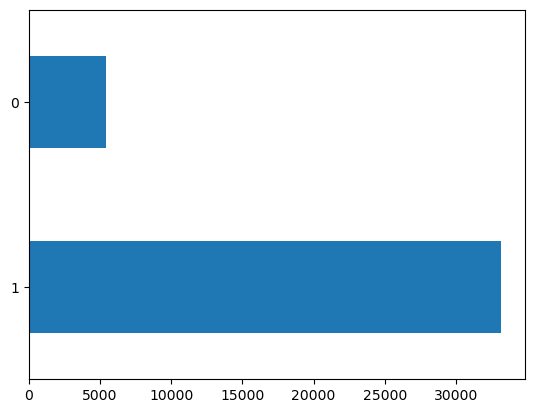

In [102]:
df["loan_status"].value_counts().plot.barh();

In [103]:
df["loan_status"].value_counts()

1    33142
0     5431
Name: loan_status, dtype: int64

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,38573.0,11317.527156,7469.501975,500.00,5575.00,10000.00,15000.00,35000.00
installment,38573.0,327.330308,209.201853,15.69,168.73,283.57,435.54,1305.19
annual_inc,38573.0,68976.469785,47746.218207,4000.00,41500.00,60000.00,83004.00,1080000.00
loan_status,38573.0,0.859202,0.347818,0.00,1.00,1.00,1.00,1.00
dti,38573.0,13.344460,6.661221,0.00,8.22,13.43,18.61,29.99
delinq_2yrs,38573.0,0.146813,0.492387,0.00,0.00,0.00,0.00,11.00
inq_last_6mths,38573.0,0.870116,1.069421,0.00,0.00,1.00,1.00,8.00
open_acc,38573.0,9.323257,4.392040,2.00,6.00,9.00,12.00,44.00
pub_rec,38573.0,0.053535,0.234686,0.00,0.00,0.00,0.00,4.00
revol_bal,38573.0,13483.289710,15922.019772,0.00,3765.00,8965.00,17179.00,149588.00


In [105]:
df.loan_status.value_counts()

1    33142
0     5431
Name: loan_status, dtype: int64

In [106]:
#We choose the 'LogisticRegression' model because we are doing the classification process.

In [107]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



In [108]:
#Modeling with Scikit-Learn

In [109]:
y=df["loan_status"]
x=df.drop(["loan_status"], axis=1)

In [110]:

loj = LogisticRegression(solver='liblinear')
loj_model=loj.fit(x,y)
loj_model

LogisticRegression(solver='liblinear')

In [111]:
#constant coefficient

In [112]:
loj_model.intercept_

array([0.00411944])

In [113]:
#Coefficients of independent variables

In [114]:
loj_model.coef_

array([[-9.62698249e-05,  2.93234740e-03,  1.42467547e-05,
         3.07337537e-02, -3.83436653e-04, -1.70010865e-03,
         1.63036935e-02, -5.18044264e-04, -1.38309873e-05,
         2.36181225e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.21809707e-03,  9.43183341e-03,
        -8.21017827e-04,  5.84488207e-03, -1.72544617e-03,
         3.39559771e-03,  1.13408730e-03, -4.10249109e-04,
         7.75704148e-04,  1.21958396e-06, -1.02060009e-05,
         5.30394019e-04,  2.82232415e-03,  5.26781662e-04,
         1.13557220e-03,  1.22900796e-03,  4.26081157e-05,
         3.49070416e-04,  8.45282254e-06,  7.28340162e-04,
         5.43030480e-05,  7.73481171e-05,  3.66057657e-04,
        -1.11350462e-05, -7.05223644e-04,  4.50663831e-05,
         2.73186050e-04]])

# Predict&Model Tuning

In [115]:
y_pred=loj_model.predict(x)

In [116]:
#Our correct classification rate.

In [117]:
confusion_matrix(y,y_pred)

array([[   11,  5420],
       [   24, 33118]], dtype=int64)

In [118]:
accuracy_score(y,y_pred)


0.8588650092033288

In [119]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.00      0.00      5431
           1       0.86      1.00      0.92     33142

    accuracy                           0.86     38573
   macro avg       0.59      0.50      0.46     38573
weighted avg       0.78      0.86      0.79     38573



In [120]:
#Following are the estimated values

In [121]:
loj_model.predict(x)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [122]:
#The prediction has drawn the probability values. Here we will select the threshold value.

In [123]:
loj_model.predict_proba(x)[0:10][:,0:2]

array([[0.20701791, 0.79298209],
       [0.36169284, 0.63830716],
       [0.31441973, 0.68558027],
       [0.07915095, 0.92084905],
       [0.23111269, 0.76888731],
       [0.19365333, 0.80634667],
       [0.26326834, 0.73673166],
       [0.23808904, 0.76191096],
       [0.35162419, 0.64837581],
       [0.10365091, 0.89634909]])

In [124]:
#Actual values

In [125]:

y[0:10]

0     1
1     0
2     1
3     1
5     1
6     1
7     1
8     0
9     0
10    1
Name: loan_status, dtype: int64

In [126]:
#Now we will choose a threshold value. This way we will do the validation ourselves

In [127]:
y_probs=loj_model.predict_proba(x)
y_probs=y_probs[:,1]

In [128]:

y_probs[0:10]

array([0.79298209, 0.63830716, 0.68558027, 0.92084905, 0.76888731,
       0.80634667, 0.73673166, 0.76191096, 0.64837581, 0.89634909])

In [ ]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs] 

In [ ]:
y_pred[0:10]

In [ ]:
#Result: We made a good guess. We verified that we chose a correct dependent variable.

In [ ]:
loj_model.predict_proba(x)[:,1][0:5]

In [ ]:
logit_roc_auc=roc_auc_score(y,loj_model.predict(x))
fpr,tpr,thresholds=roc_curve(y,loj_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area=%0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=42)

In [135]:
loj = LogisticRegression(solver='liblinear')
loj_model=loj.fit(x_train,y_train)
loj_model



LogisticRegression(solver='liblinear')

In [136]:
accuracy_score(y_test,loj_model.predict(x_test))

0.8574243052675239

In [137]:
cross_val_score(loj_model,x_test,y_test, cv=10)


array([0.85699482, 0.85803109, 0.85699482, 0.85906736, 0.85788382,
       0.85580913, 0.85788382, 0.85684647, 0.85684647, 0.85892116])

In [138]:

cross_val_score(loj_model,x_test,y_test, cv=10).mean()

0.8575278954270849

In [139]:
#When we get the average, we have reached the most accurate result.

# Estimating with the Other Method

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38573 entries, 0 to 39753
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38573 non-null  float64
 1   installment                          38573 non-null  float64
 2   annual_inc                           38573 non-null  float64
 3   loan_status                          38573 non-null  int64  
 4   dti                                  38573 non-null  float64
 5   delinq_2yrs                          38573 non-null  float64
 6   inq_last_6mths                       38573 non-null  float64
 7   open_acc                             38573 non-null  float64
 8   pub_rec                              38573 non-null  float64
 9   revol_bal                            38573 non-null  float64
 10  total_acc                            38573 non-null  float64
 11  acc_now_delinq              

In [141]:
df.loan_status.value_counts()

1    33142
0     5431
Name: loan_status, dtype: int64

In [142]:
features=df.drop("loan_status",axis=1) 
target=df['loan_status']

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr=LogisticRegression(class_weight='balanced')


In [144]:
df.head()

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
features.head()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,12.0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
predictions=cross_val_predict(lr,features,target, cv=3)

In [147]:
predictions_2=pd.Series(predictions)

In [148]:
predictions_2.value_counts()

0    19369
1    19204
dtype: int64

In [149]:
#False positives:
fp_filter=(predictions==1)&(target==0)
fp=len(predictions[fp_filter])

#True positives:
tp_filter=(predictions==1)&(target==1)
tp=len(predictions[fp_filter])


#False negatives:
fn_filter=(predictions==0)&(target==1)
fn=len(predictions[fp_filter])


#True negatives:
tn_filter=(predictions==0)&(target==0)
tn=len(predictions[fp_filter])



In [150]:
#Rates:
tpr=tp/(tp+fn)
fpr=fp/(fp+tn)
print(tpr)
print(fpr)

0.5
0.5


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
import pandas as pd

# Penalty dictionary
penalty = {0: 10, 1: 1}

# Logistic Regression model with class weights
lr = LogisticRegression(class_weight=penalty)


# Make predictions using 3-fold cross-validation
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives:
fp_filter = (predictions == 1) & (target == 0)
fp = len(predictions[fp_filter])

# True positives:
tp_filter = (predictions == 1) & (target == 1)
tp = len(predictions[tp_filter])

# False negatives:
fn_filter = (predictions == 0) & (target == 1)
fn = len(predictions[fn_filter])

# True negatives:
tn_filter = (predictions == 0) & (target == 0)
tn = len(predictions[tn_filter])

# Rates:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


True Positive Rate (TPR): 0.16755244755244755
False Positive Rate (FPR): 0.1586998087954111


In [152]:
#Number of credits given without penalty system

In [153]:
predictions.head(40)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
dtype: int64

In [154]:
#Number of credits given when we apply the penalty system

In [155]:
predictions_2.head(40)

0     0
1     0
2     0
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    1
17    1
18    1
19    0
20    1
21    0
22    0
23    1
24    1
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    0
33    0
34    1
35    0
36    0
37    1
38    1
39    0
dtype: int64

In [156]:
df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,109.79,98000.0,1,8.52,1.0,0.0,19.0,0.0,6432.0,...,0,0,0,0,0,0,0,0,0,0
39749,3000.0,99.44,36153.0,1,7.47,0.0,2.0,3.0,1.0,1064.0,...,0,0,0,0,0,0,0,0,0,0
39750,3500.0,113.39,20000.0,1,1.50,0.0,0.0,17.0,0.0,1882.0,...,0,0,0,0,1,0,0,0,0,0
39752,5000.0,155.38,40000.0,1,2.55,0.0,2.0,4.0,0.0,2562.0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
df.dtypes.value_counts()

uint8      24
float64    15
int64       2
dtype: int64

# XGBoost Modeli   (eXtreme Gradient Boosting)

# Model&Predict

In [161]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [162]:

y=df["loan_status"]
x=df.drop(["loan_status"], axis=1)
x=pd.DataFrame(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)



In [163]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [164]:
print(x_train.columns)
x_train = x_train.loc[:, ~x_train.columns.duplicated()]



Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'int_rate', 'emp_length',
       'revol_util', 'term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


In [165]:
print(x_train.columns)

Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'int_rate', 'emp_length',
       'revol_util', 'term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


In [166]:
xgb_model=XGBClassifier().fit(x_train,y_train)

In [167]:

xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [168]:

y_pred=xgb_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8524887659868648

# Model Tuning

In [169]:
xgb_params={
    'n_estimators':[100,500,1000,2000],
    'subsample'   :[0.6,0.8,1.0],
    'max_depth'   :[3,4,5,6],
    'learning_rate':[0.1,0.01,0.02,0.05],
    'min_samples_split':[2,5,10]
    
    
    
}

In [170]:

xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1, verbose=2)

In [ ]:
xgb_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


In [ ]:
xgb_cv_model.best_params_

In [ ]:

xgb=XGBClassifier(learning_rate=0.01,
                 max_depth=6,
                  min_samples_split=2,
                  n_estimators=100,
                  subsample=0.8)
                  

In [ ]:
xgb_tuned=xgb.fit(x_train,y_train)

In [ ]:
y_pred=xgb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)